# Goal 1- Load the Social Security data about baby names

In [3]:
# library imports

import numpy as np
import pandas as pd

In [4]:
# initialize variables

all_names = None
names_year_list = [] 

In [5]:
years = range(1880, 2018)
cols = ['Name', 'Sex', 'Number']

In [6]:
# loop through the files
for year in years:
    names_year = pd.read_csv('names/yob%d.txt' % year, names=cols)
    names_year['Year'] = year
    names_year_list.append(names_year)
    
# concatenate the dataframe in the list into one dataframe
all_names = pd.concat(names_year_list, ignore_index=True)
all_names.head()

,Name,Sex,Number,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


# Goal 2 – Compare popularity trend of following names in form of a nice plot accross all the years since 1880
   a. ['Michael', 'John', 'David', 'Martin']
   
   b. ['Emily', 'Anna', 'Claire', 'Elizabeth']

In [7]:
#index the data on gender first, then name and then the year

allnames_sorted = all_names.set_index(['Sex','Name','Year']).sort_index(level=0)
allnames_sorted.head(20)


Number
Sex Name      Year        
F   Aabha     2011       7
              2012       5
              2014       9
              2015       7
              2016       7
    Aabriella 2008       5
              2014       5
              2015       5
              2016      11
              2017       6
    Aada      2015       5
    Aaden     2009       5
    Aadhira   2012       6
              2013      10
              2014      13
              2015       8
              2016      14
              2017      26
    Aadhvika  2016       9
    Aadhya    2007      10

In [8]:
# library imports
import matplotlib.pyplot as plt

#A function which plots the values of this subset of data 
def draw(sex,name):
    subset = allnames_sorted.loc[sex,name]
    plt.plot(subset.index,subset.values)


# scatter plot

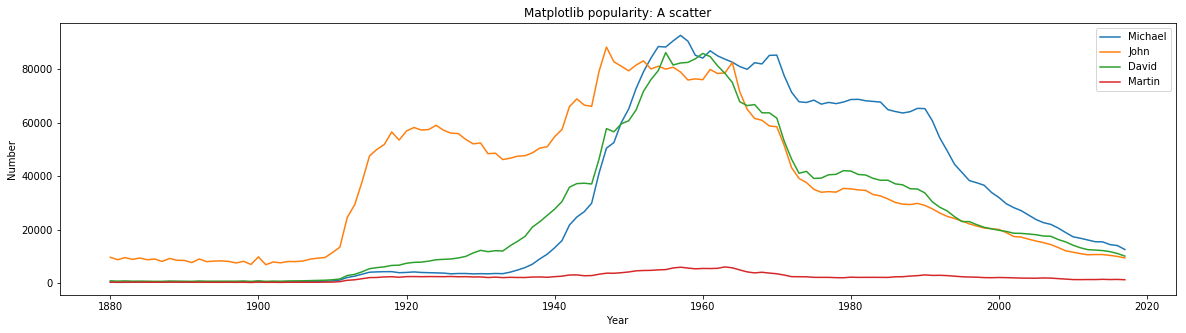

In [9]:
#Select some names for plotting.
names = ['Michael','John','David','Martin']

#Select the size of the plot
plt.figure(figsize=(20,5))

#Call the 'draw' function for each name in above list.
for name in names:
    draw('M',name)
plt.title("Matplotlib popularity: A scatter")  
plt.xlabel("Year")
plt.ylabel("Number")
plt.legend(names)
plt.show()

# pie chart

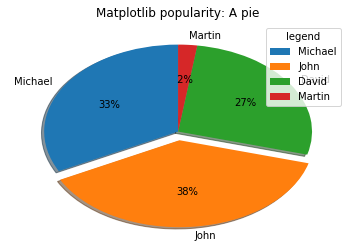

In [10]:
# Compare popularity trend of following names in form of pie chart accross all the years since 1880 as the sum
# a= ['Michael', 'John', 'David', 'Martin']
explode=(0,0.1,0,0)
labels=names
plt.title("Matplotlib popularity: A pie")
plt.pie([sum(allnames_sorted.loc['M','Michael'].values),sum(allnames_sorted.loc['M','John'].values),sum(allnames_sorted.loc['M','David'].values),sum(allnames_sorted.loc['M','Martin'].values)],labels=names,explode=explode,autopct="%2.0f%%", shadow=True, startangle=90)
plt.legend(title="legend" ,loc="best")
plt.show()


# scatter plot

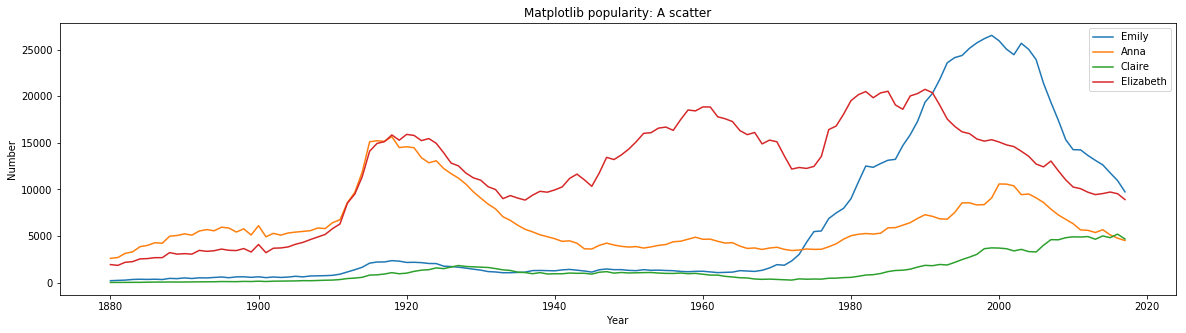

In [11]:
#Select the size of the plot
plt.figure(figsize=(20,5))

#Select some names for plotting.
names = ['Emily','Anna','Claire','Elizabeth']

#Call the 'draw' function for each name in above list.
for name in names:
    draw('F',name)
plt.title("Matplotlib popularity: A scatter")    
plt.xlabel("Year")
plt.ylabel("Number")
plt.legend(names)
plt.show()

# pie chart


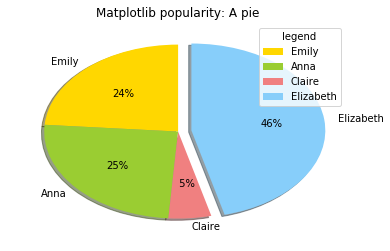

In [12]:
# Compare popularity trend of following names in form of pie chart accross all the years since 1880 as the sum
# b= ['Emily', 'Anna', 'Claire', 'Elizabeth']
explode=(0,0,0,0.1)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
labels=names
plt.title("Matplotlib popularity: A pie")
plt.pie([sum(allnames_sorted.loc['F','Emily'].values),sum(allnames_sorted.loc['F','Anna'].values),sum(allnames_sorted.loc['F','Claire'].values),sum(allnames_sorted.loc['F','Elizabeth'].values)],labels=names,explode=explode,autopct="%2.0f%%",colors=colors, shadow=True, startangle=90)
plt.legend(title="legend" ,loc="best")
plt.show()


# Extract the 10 most popular -
   a. Girl names in year 2010
   
   b. Boy names in year 2001

In [13]:
# library imports
import pandas as pd
df1=pd.read_csv("names/yob2010.txt",header=None, names=['Name','Sex','Number'])
df2=pd.read_csv("names/yob2001.txt",header=None, names=['Name','Sex','Number'])

In [14]:
# 10 most popular girls name in 2010
df1[df1['Sex']=='F'].head(10)[["Name"]]

,Name
0,Isabella
1,Sophia
2,Emma
3,Olivia
4,Ava
5,Emily
6,Abigail
7,Madison
8,Chloe
9,Mia


In [15]:
# 10 most popular boys name in 2010
df1[df1['Sex']=='M'].head(10)[["Name"]].reset_index(drop=True)


,Name
0,Jacob
1,Ethan
2,Michael
3,Jayden
4,William
5,Alexander
6,Noah
7,Daniel
8,Aiden
9,Anthony


In [16]:
# 10 most popular girls name in 2001
df2[df2['Sex']=='F'].head(10)[["Name"]]

,Name
0,Emily
1,Madison
2,Hannah
3,Ashley
4,Alexis
5,Sarah
6,Samantha
7,Abigail
8,Elizabeth
9,Olivia


In [17]:
# 10 most popular boys name in 2001
df2[df2['Sex']=='M'].head(10)[["Name"]].reset_index(drop=True)

,Name
0,Jacob
1,Michael
2,Matthew
3,Joshua
4,Christopher
5,Nicholas
6,Andrew
7,Joseph
8,Daniel
9,William


In [18]:
# 10 most popular girls name & boys name in 2010 in one table
pd.concat([df1[df1['Sex']=='F'].head(10)[["Name","Sex"]],df1[df1['Sex']=='M'].head(10)[["Name","Sex"]].reset_index(drop=True)],axis=1)

,Name,Sex,Name,Sex
0,Isabella,F,Jacob,M
1,Sophia,F,Ethan,M
2,Emma,F,Michael,M
3,Olivia,F,Jayden,M
4,Ava,F,William,M
5,Emily,F,Alexander,M
6,Abigail,F,Noah,M
7,Madison,F,Daniel,M
8,Chloe,F,Aiden,M
9,Mia,F,Anthony,M


In [19]:
# 10 most popular girls name & boys name in 2001 in one table
pd.concat([df2[df2['Sex']=='F'].head(10)[["Name","Sex"]],df2[df2['Sex']=='M'].head(10)[["Name","Sex"]].reset_index(drop=True)],axis=1)

,Name,Sex,Name,Sex
0,Emily,F,Jacob,M
1,Madison,F,Michael,M
2,Hannah,F,Matthew,M
3,Ashley,F,Joshua,M
4,Alexis,F,Christopher,M
5,Sarah,F,Nicholas,M
6,Samantha,F,Andrew,M
7,Abigail,F,Joseph,M
8,Elizabeth,F,Daniel,M
9,Olivia,F,William,M


# top 5 names in each year from 2001 to 2010 into single table

In [20]:
#index the data on gender first, then name and then the year

allnames_sorted = all_names.set_index(['Sex','Name','Year']).sort_index(level=0)
allnames_sorted.head(20)

allnames_sorted.loc['M',:,2008].sort_values('Number',ascending=False).head()

Number
Sex Name    Year        
M   Jacob   2008   22591
    Michael 2008   20617
    Ethan   2008   20211
    Joshua  2008   19200
    Daniel  2008   19001

In [21]:
#Create a new DataFrame after sorting.
yob2008 = allnames_sorted.loc['M',:,2008].sort_values('Number',ascending=False)

#Use 'drop' method to delete columns and 'reset_index' to reset the index.
yob2008.reset_index().drop(['Sex','Year','Number'],axis=1).head()

,Name
0,Jacob
1,Michael
2,Ethan
3,Joshua
4,Daniel


In [23]:
#Function yearwise to sort, drop and reset the index for single year.
def yearwise(sex,year):
    space = allnames_sorted.loc[sex,:,year].sort_values('Number',ascending=False).reset_index()
    space = space.drop(['Sex','Year','Number'],axis=1).head(5)
    space.columns = [year]
    space.index = space.index + 1
    return space

#Function sortring to call the 'yearwise_sorting' for definite period say 10 years.
def sortring(sex,y1,y2):
    years = [yearwise(sex,year) for year in range(y1,y2+1)]
    return years[0].join(years[1:])

#Now call the 'sorting' function for the year 2001 to 2010.
print(sortring('M',2001,2010))

          2001     2002     2003     2004     2005     2006     2007     2008  \
1        Jacob    Jacob    Jacob    Jacob    Jacob    Jacob    Jacob    Jacob   
2      Michael  Michael  Michael  Michael  Michael  Michael  Michael  Michael   
3      Matthew   Joshua   Joshua   Joshua   Joshua   Joshua    Ethan    Ethan   
4       Joshua  Matthew  Matthew  Matthew  Matthew    Ethan   Joshua   Joshua   
5  Christopher    Ethan   Andrew    Ethan    Ethan  Matthew   Daniel   Daniel   

        2009     2010  
1      Jacob    Jacob  
2      Ethan    Ethan  
3    Michael  Michael  
4  Alexander   Jayden  
5    William  William  


In [24]:
#top 5  girls names in each year from 2001 to 2010 into single table
print(sortring('F',2001,2010))

      2001     2002     2003     2004     2005      2006      2007      2008  \
1    Emily    Emily    Emily    Emily    Emily     Emily     Emily      Emma   
2  Madison  Madison     Emma     Emma     Emma      Emma  Isabella  Isabella   
3   Hannah   Hannah  Madison  Madison  Madison   Madison      Emma     Emily   
4   Ashley     Emma   Hannah   Olivia  Abigail  Isabella       Ava    Olivia   
5   Alexis   Alexis   Olivia   Hannah   Olivia       Ava   Madison       Ava   

       2009      2010  
1  Isabella  Isabella  
2      Emma    Sophia  
3    Olivia      Emma  
4    Sophia    Olivia  
5       Ava       Ava  
